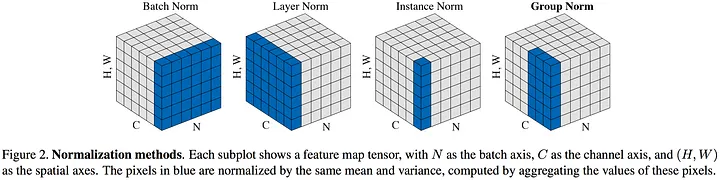

# Normalization in Deep Learning — A Complete and Improved Explanation

Normalization plays a fundamental role in modern deep learning. It addresses core training challenges such as internal covariate shift, unstable gradients, slow convergence, and sensitivity to initialization. By enforcing consistent statistical behavior in intermediate activations, normalization makes training more stable, improves optimization, and often enhances generalization.

---

## 1. What Is Normalization?

Normalization refers to techniques that rescale inputs or activations so that they follow controlled statistical properties—typically zero mean and unit variance, or unit vector norm.

If two features  
$$[x_1, x_2]$$  
differ significantly in magnitude, then gradient descent will require very different learning rates along each dimension. This produces elongated loss contours and slows optimization. After normalization, loss contours become more isotropic (spherical), enabling faster and more stable training.

Beyond mean–variance scaling, normalization can also enforce unit-length vectors—useful in contexts where relative feature importance matters more than absolute magnitude (e.g., tf–idf vectors in NLP).

**PyTorch example:**

```
import torch.nn.functional as F

def unit_length_normalize(x):
    return F.normalize(x, p=2, dim=1)


```
## Batch Normalization (BatchNorm)

BatchNorm normalizes each activation channel using the mean and variance computed across the mini-batch. After normalization, it applies learnable parameters  
$$\gamma,\; \beta$$  
to preserve model expressiveness.

### Why BatchNorm Works
- Rescales activations across layers.  
- Smooths the loss landscape, enabling larger learning rates.  
- Adds noise via batch statistics, acting as a regularizer.

### Original Motivation
BatchNorm was introduced to reduce **Internal Covariate Shift**—the drift in activation distributions during training. Although later work questioned whether this fully explains its effectiveness, BatchNorm remains empirically powerful.

### Limitations
- Unstable with very small batch sizes.  
- Creates dependency among samples in a batch.  
- Not ideal for distributed or multi-device training.  
- Fine-tuning introduces ambiguity (running statistics vs. batch statistics).  
- Less effective for RNNs unless adapted.

---

## Weight Normalization

Weight Normalization reparameterizes a weight vector \( w \) as:

$$
w = a \frac{v}{\|v\|}
$$

where  
- \( v \) controls direction  
- \( a \) controls scale  

### Key Idea
Decouples magnitude from direction, producing smoother optimization independent of batch statistics.

### Advantages
- Efficient for CNNs, where weights are few relative to activations.  
- Independent of batch size.  
- Often accelerates convergence compared to BatchNorm.

---

## Layer Normalization (LayerNorm)

LayerNorm normalizes across feature dimensions for each sample individually. It uses learnable parameters  
$$\gamma,\; \beta$$  
just like BatchNorm.

### Advantages
- Works with batch size = 1 or highly variable batch sizes.  
- Excellent for RNNs, LSTMs, and Transformers.  
- Invariant to scaling of inputs and weights.  
- Standard normalization in NLP and sequence modeling.

LayerNorm is the default choice for Transformer architectures.

---

## Group Normalization (GroupNorm)

GroupNorm splits channels into groups and computes mean and variance per group for each sample.

### Why GroupNorm Instead of LayerNorm?
CNN channels often represent related spatial features; grouping preserves these relationships while still controlling variance.

### Advantages
- Independent of batch size.  
- More expressive than LayerNorm for CNN-based architectures.  
- Well-suited for detection, segmentation, and generative vision tasks.  
- Common in high-resolution or small-batch settings.

---

## Instance Normalization (InstanceNorm)

InstanceNorm normalizes each sample **per channel**, independently of all other samples.

### Why It Works for Style Transfer
It removes instance-specific statistics—such as brightness and contrast—allowing the network to manipulate “style” independently from content structure.

This makes InstanceNorm essential for style transfer and certain generative modeling tasks.

---

## Spectral Normalization

SpectralNorm stabilizes neural networks by controlling the Lipschitz constant. It divides a weight matrix \(W\) by its largest singular value:

$$
W_{\text{SN}} = \frac{W}{\sigma_{\max}(W)}
$$

where \(\sigma_{\max}(W)\) is approximated using power iteration.

### Why It Was Introduced
Designed for GAN training to reduce mode collapse by ensuring the discriminator stays close to **1-Lipschitz**.

### Benefits
- Stabilizes adversarial training.  
- Controls output sensitivity to input perturbations.  
- Encourages smooth gradient propagation.

**PyTorch implementation:**
```
torch.nn.utils.parametrizations.spectral_norm
```
## Conclusion

Normalization is a cornerstone of modern deep learning. Each method provides a different balance of stability, efficiency, and expressive capacity:

- **BatchNorm**: Highly effective but dependent on batch size.  
- **WeightNorm**: Batch-free and improves optimization smoothness.  
- **LayerNorm**: Essential for NLP and Transformer-based architectures.  
- **GroupNorm**: Excellent for CNNs and small-batch vision models.  
- **InstanceNorm**: Crucial for style transfer and generative imaging.  
- **SpectralNorm**: Controls Lipschitz behavior and stabilizes GANs.

Selecting the appropriate normalization method is critical for achieving stable, efficient, and high-performing deep learning models. As research evolves, newer normalization strategies continue to enhance stability, speed, and generalization across a wide range of applications.


# Mathematical Formulations of Normalization Methods in Deep Learning

---

## 1. General Mean–Variance Normalization

Given an input tensor \( x \), normalization uses:

### Mean
$$
\mu = \frac{1}{m} \sum_{i=1}^{m} x_i
$$

### Variance
$$
\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2
$$

### Standard Normalization
$$
\hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

### Learnable Re-scaling
$$
y_i = \gamma \hat{x}_i + \beta
$$

---

## 2. Unit-Length (L2) Normalization

For a vector \( x \in \mathbb{R}^d \):

### L2 Norm
$$
\|x\|_2 = \sqrt{\sum_{i=1}^{d} x_i^2}
$$

### Unit Vector Normalization
$$
x_{\text{norm}} = \frac{x}{\|x\|_2}
$$

---

## 3. Batch Normalization

For convolutional layers, BatchNorm normalizes across the batch and spatial dimensions:

### Mean per Channel
$$
\mu_c = \frac{1}{N H W} \sum_{n,h,w} x_{nchw}
$$

### Variance per Channel
$$
\sigma_c^2 = \frac{1}{N H W} \sum_{n,h,w} (x_{nchw} - \mu_c)^2
$$

### Normalized Activation
$$
\hat{x}_{nchw} = \frac{x_{nchw} - \mu_c}{\sqrt{\sigma_c^2 + \epsilon}}
$$

### Affine Transform
$$
y_{nchw} = \gamma_c \hat{x}_{nchw} + \beta_c
$$

### Running Averages (Inference)
$$
\mu_c^{\text{running}} = (1-\alpha)\mu_c^{\text{running}} + \alpha\mu_c
$$

$$
\sigma_{c,\text{running}}^2 = (1-\alpha)\sigma_{c,\text{running}}^2 + \alpha\sigma_c^2
$$

---

## 4. Weight Normalization

A weight vector \( w \in \mathbb{R}^d \) is reparameterized as:

### Reparameterization
$$
w = g \cdot \frac{v}{\|v\|}
$$

Where:

- \( g \in \mathbb{R} \) is a scale parameter  
- \( v \in \mathbb{R}^d \) is a direction vector

### WeightNorm Output
$$
y = w^\top x = g \cdot \frac{v^\top x}{\|v\|}
$$

---

## 5. Layer Normalization

LayerNorm normalizes across all features for each sample \( x \in \mathbb{R}^d \):

### Mean per Sample
$$
\mu = \frac{1}{d} \sum_{i=1}^{d} x_i
$$

### Variance per Sample
$$
\sigma^2 = \frac{1}{d} \sum_{i=1}^{d} (x_i - \mu)^2
$$

### Normalized Activation
$$
\hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

### Affine Transform
$$
y_i = \gamma_i \hat{x}_i + \beta_i
$$

---

## 6. Group Normalization

Let the number of channels be \( C \) and the number of groups be \( G \).  
Each group contains:

$$
C_g = \frac{C}{G}
$$

### Group Mean
$$
\mu_g = \frac{1}{C_g H W} \sum_{c \in g} \sum_{h,w} x_{nchw}
$$

### Group Variance
$$
\sigma_g^2 = \frac{1}{C_g H W} \sum_{c \in g} \sum_{h,w} (x_{nchw} - \mu_g)^2
$$

### Group-Normalized Activation
$$
\hat{x}_{nchw} = \frac{x_{nchw} - \mu_g}{\sqrt{\sigma_g^2 + \epsilon}}
$$

### Affine Transform
$$
y_{nchw} = \gamma_c \hat{x}_{nchw} + \beta_c
$$

---

## 7. Instance Normalization

InstanceNorm normalizes per sample per channel.

### Instance Mean
$$
\mu_{nc} = \frac{1}{H W} \sum_{h,w} x_{nchw}
$$

### Instance Variance
$$
\sigma_{nc}^2 = \frac{1}{H W} \sum_{h,w} (x_{nchw} - \mu_{nc})^2
$$

### Normalized Activation
$$
\hat{x}_{nchw} = \frac{x_{nchw} - \mu_{nc}}{\sqrt{\sigma_{nc}^2 + \epsilon}}
$$

### Affine Transform
$$
y_{nchw} = \gamma_c \hat{x}_{nchw} + \beta_c
$$

---

## 8. Spectral Normalization

Given a weight matrix \( W \in \mathbb{R}^{m \times n} \):

### Spectral Norm (Largest Singular Value)
$$
\sigma_{\max}(W) = \max_{\|v\| = 1} \|Wv\|
$$

### Spectrally Normalized Weights
$$
W_{\text{SN}} = \frac{W}{\sigma_{\max}(W)}
$$

### Power Iteration Approximation

Given vectors \( u, v \):

$$
v \leftarrow \frac{W^\top u}{\|W^\top u\|}
$$

$$
u \leftarrow \frac{Wv}{\|Wv\|}
$$

Approximation:

$$
\sigma_{\max}(W) \approx u^\top W v
$$

Final output:

$$
W_{\text{SN}} = \frac{W}{u^\top Wv}
$$

---

## 9. Lipschitz Constraints

SpectralNorm enforces:

$$
\|f(x_1) - f(x_2)\| \le K \|x_1 - x_2\|
$$

where \( K = 1 \) or close to 1.

### Two-Sided Gradient Penalty (Alternative)
Used in WGAN-GP:

$$
(\|\nabla_x f(x)\|_2 - 1)^2
$$

---

## 10. Bi-Lipschitz Property

A function \( f \) is bi-Lipschitz if:

$$
c\|x_1 - x_2\| \le \|f(x_1) - f(x_2)\| \le C\|x_1 - x_2\|
$$

SpectralNorm ensures the **upper bound** \( C \).

---

## 11. Relation to Residual Networks

Given a residual block:

$$
f(x) = x + g(x)
$$

If \( g(x) \to 0 \), then:

$$
f(x) \approx x
$$

This explains collapse to identity under gradient penalties.  
SpectralNorm avoids this collapse.

---

## 12. General Affine Post-Normalization Equation

All mean–variance normalization layers use:

$$
y = \gamma \cdot \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta
$$

This applies to BatchNorm, LayerNorm, GroupNorm, and InstanceNorm.

---

## 13. Summary Table of Equations

| **Method**      | **Normalization Axes** | **Mean Formula** | **Variance Formula** |
|-----------------|------------------------|------------------|----------------------|
| **BatchNorm**   | $$N, H, W$$ | $$\mu_c = \frac{1}{NHW}\sum x$$ | $$\sigma_c^2 = \frac{1}{NHW}\sum (x - \mu)^2$$ |
| **LayerNorm**   | Features | $$\mu = \frac{1}{d}\sum x$$ | $$\sigma^2 = \frac{1}{d}\sum (x - \mu)^2$$ |
| **GroupNorm**   | Channel groups | $$\mu_g = \frac{1}{C_gHW}\sum x$$ | $$\sigma_g^2 = \frac{1}{C_gHW}\sum (x - \mu)^2$$ |
| **InstanceNorm**| Per sample, per channel | $$\mu_{nc} = \frac{1}{HW}\sum x$$ | $$\sigma_{nc}^2 = \frac{1}{HW}\sum (x - \mu)^2$$ |
| **WeightNorm**  | Weight vector | $$w = g\frac{v}{\|v\|}$$ | — |
| **SpectralNorm**| Weight matrix | $$W_{\text{SN}} = \frac{W}{\sigma_{\max}}$$ | $$\sigma_{\max} = u^\top W v$$ |


---


# The Complete Comparison Table of Normalization Methods in Deep Learning

## Full Mathematical & Conceptual Comparison

| **Method** | **Normalization Axes** | **Mean Formula** | **Variance Formula** | **Key Equation** | **Advantages** | **Disadvantages / Limitations** | **Best Use Cases** |
|-----------|------------------------|------------------|----------------------|------------------|----------------|----------------------------------|---------------------|
| **Batch Normalization** | Across batch, height, width per channel: $$N,H,W$$ | $$\mu_c=\frac{1}{NHW}\sum x_{nchw}$$ | $$\sigma_c^2=\frac{1}{NHW}\sum (x_{nchw}-\mu_c)^2$$ | $$y=\gamma_c\frac{x-\mu_c}{\sqrt{\sigma_c^2+\epsilon}}+\beta_c$$ | Very effective, fast training, smooth optimization, regularization effect | Fails with small batches, introduces batch dependency, poor for RNNs | CNNs with large batch sizes, image classification |
| **Layer Normalization** | Across features per sample | $$\mu=\frac{1}{d}\sum_{i=1}^d x_i$$ | $$\sigma^2=\frac{1}{d}\sum (x_i-\mu)^2$$ | $$y_i=\gamma_i\hat{x}_i+\beta_i$$ | Independent of batch size, excellent for sequences, stable for Transformers | Less suited for CNNs with spatial structure | Transformers, RNNs, LSTMs, NLP |
| **Group Normalization** | Across groups of channels | $$\mu_g=\frac{1}{C_gHW}\sum x$$ | $$\sigma_g^2=\frac{1}{C_gHW}\sum (x-\mu_g)^2$$ | $$y=\gamma_c\frac{x-\mu_g}{\sqrt{\sigma_g^2+\epsilon}}+\beta_c$$ | Works with any batch size, captures channel relations | Must choose groups \(G\), requires tuning | CNNs, detection, segmentation, small-batch vision |
| **Instance Normalization** | Per instance per channel: $$H,W$$ | $$\mu_{nc}=\frac{1}{HW}\sum x_{nchw}$$ | $$\sigma_{nc}^2=\frac{1}{HW}\sum (x_{nchw}-\mu_{nc})^2$$ | $$y=\gamma_c\frac{x-\mu_{nc}}{\sqrt{\sigma_{nc}^2+\epsilon}}+\beta_c$$ | Removes instance-specific contrast, ideal for style transfer | Removes global statistics, not suitable for classification | Style transfer, image generation |
| **Weight Normalization** | Applied to weights, not activations | — | — | $$w=g\frac{v}{\|v\|}$$ | Decouples magnitude/direction, faster training, batch independent | Does not solve covariate shift; incomplete normalization | CNNs, RL, small batches |
| **Spectral Normalization** | Weight matrix normalization | — | — | $$W_{\text{SN}}=\frac{W}{\sigma_{\max}(W)},\quad \sigma_{\max}\approx u^\top W v$$ | Controls Lipschitz constant, stabilizes GANs, prevents mode collapse | Computationally heavier, not mean–variance normalization | GANs, stable generative modeling, invertible models |
| **L2 Unit Vector Normalization** | Vector magnitude normalization | — | — | $$x_{\text{norm}}=\frac{x}{\|x\|_2}$$ | Preserves direction, fixes vector scale | Not suitable for CNN activations | NLP, tf-idf, embedding similarity |

---

# High-Level Conceptual Comparison

| **Method** | **Depends on Batch Size?** | **Works for CNNs?** | **Works for RNNs / Transformers?** | **Regularization Effect** | **Controls Lipschitz Constant?** |
|-----------|----------------------------|----------------------|------------------------------------|---------------------------|----------------------------------|
| **BatchNorm** | Yes | ✔ Excellent | ✖ Poor | Medium | ✖ No |
| **LayerNorm** | No | ✖ Not ideal | ✔ Excellent | Low | ✖ No |
| **GroupNorm** | No | ✔ Excellent | ✖ Rare | Low | ✖ No |
| **InstanceNorm** | No | ✔ Special use | ✖ Rare | Medium | ✖ No |
| **WeightNorm** | No | ✔ Good | ✔ Good | Low | ✖ No |
| **SpectralNorm** | No | ✔ Good | ✔ Good | High | ✔ Yes |
| **L2 Normalization** | No | ✖ | ✔ Text tasks | None | ✖ No |

---

# When to Use Which Normalization?

| **Goal** | **Best Method** |
|----------|------------------|
| Maximum accuracy in CNNs with large batches | **BatchNorm** |
| Stable NLP / Transformers training | **LayerNorm** |
| CNNs with small batch sizes | **GroupNorm** |
| Style transfer / artistic generation | **InstanceNorm** |
| Fast training without batch dependency | **WeightNorm** |
| Stabilizing GANs / avoiding mode collapse | **SpectralNorm** |
| Normalize embeddings / text vectors | **L2 Normalization** |

---
